<a href="https://colab.research.google.com/github/bellaabdelouahab/Colab-Notebooks/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP08 SVM (Support vector Machine)**

## **Partie 1**

#### Q1. Récupération des données

1-Utiliser load_iris  de la librairie sklearn.datasets pour récuperer les données de ce fichier 

2-Afficher les variables explicatives et et la variable explicatives.




In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
len(iris)

8

In [97]:
print(iris.feature_names,iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [98]:
Data = pd.DataFrame(iris.data,columns=iris.feature_names)
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [99]:
Data['target'] = iris.target
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [100]:
Data[Data.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [101]:
Data[Data.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [102]:
Data['Label'] =Data.target.apply(lambda x: iris.target_names[x])
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### Q2. Selection des caracteristiques
Créer les deux dataframes:
- X: le dataframe des entrée 
- y: la sortie 

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = Data.drop(['target','Label'], axis='columns')
y = Data.target

#### Q3. Partitionner ces données en X_train, X_test, y_train, y_test

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Q4. Création, entrainement et évaluation du modèle SVM
1. Utiliser le classifieur ***svm*** du module ***sklearn*** pour initialiser et entrainer quatres modèles svm avec les parametres suivants:
>- kernel: "linear";  C: 1
>- kernel: "linear";  C: 10 ; gamma=10
>- kernel: "rbf"   ;  C: 1 ; gamma=10
>- kernel: "rbf"   ;  C: 3

In [106]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [107]:
model.fit(X_train, y_train)

SVC()

In [108]:
model.score(X_test, y_test)

0.9666666666666667

In [109]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [110]:
model_1 = SVC(C=1,kernel='linear')
model_1.fit(X_train, y_train)
model_1.score(X_test, y_test)

0.9666666666666667

In [111]:
model_2 = SVC(C=10,gamma=10,kernel='linear')
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.9666666666666667

In [112]:
model_3 = SVC(C=1,gamma=10)
model_3.fit(X_train, y_train)
model_3.score(X_test, y_test)

0.9666666666666667

In [113]:
model_4 = SVC(C=3)
model_4.fit(X_train, y_train)
model_4.score(X_test, y_test)

0.9666666666666667

#### Q5. Comparaison des deux modèles
1. pour chacun des quatres modèles, afficher la matrice de confusion

2. Quel est le meilleur modèle pour ce problème? pourquoi?

In [114]:
from sklearn.metrics import plot_confusion_matrix

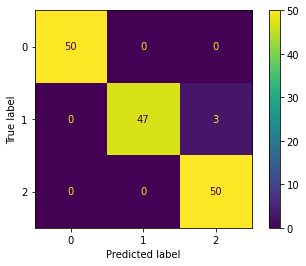

In [115]:
plot_confusion_matrix(model_1, X, y)

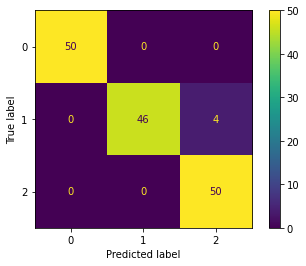

In [116]:
plot_confusion_matrix(model_2, X, y)

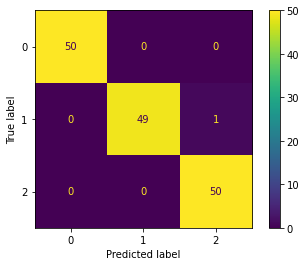

In [117]:
plot_confusion_matrix(model_3, X, y)

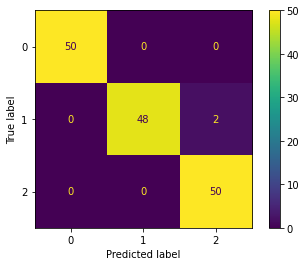

In [118]:
plot_confusion_matrix(model_4, X, y)

## **Partie II**

Entraînez le classificateur SVM à l'aide de l'ensemble de données sklearn digits (c'est-à-dire à partir de sklearn.datasets import load_digits), 
- Partitionner ces données en X_train, X_test, y_train, y_test
- Mesurez accurancy de votre modèle à l'aide de différents kernels tels que rbf et linear.
-Ajustez davantage votre modèle en utilisant les paramètres de régularisation et gamma et essayez d'obtenir le score de précision le plus élevé

In [119]:
from sklearn.datasets import load_digits

In [120]:
digits=load_digits()

In [121]:
df=pd.DataFrame(digits.data)

In [122]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [123]:
from sklearn.model_selection import train_test_split
x=df.drop(['target'],axis='columns')
y=df.target
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12)

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
model1=SVC(kernel='rbf',C=10)
model1.fit(x_train,y_train)
y_pred_1=model1.predict(x_test)
print("Model Score of Kernal(rbf) :", model1.score(x_test,y_test))

Model Score of Kernal(rbf) : 0.9944444444444445


In [125]:
model2=SVC(kernel='linear')
model2.fit(x_train,y_train)
y_pred_2=model2.predict(x_test)
print("Model Score of Kernal(linear) :", model2.score(x_test,y_test))

Model Score of Kernal(linear) : 0.975
